In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math

In [2]:
#I am using the summer products data set found here: https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish
df = pd.read_csv(r'C:/Users/admin/OneDrive/Documents/Continued Education/Thinkful/Data Science Flex/Capstone 1/summer-products-with-r-p_2020-08.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [3]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
df.drop(columns = ['currency_buyer', 'merchant_has_profile_picture', 'merchant_profile_picture', 'product_picture', 'theme'])

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,product_url,product_id,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,...,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,...,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,...,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,https://www.wish.com/c/5ea10e2c617580260d55310a,5ea10e2c617580260d55310a,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,...,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,5cedf17ad1d44c52c59e4aca,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,...,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,https://www.wish.com/c/5ebf5819ebac372b070b0e70,5ebf5819ebac372b070b0e70,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,...,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,5d5fadc99febd9356cbc52ee,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,...,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,5eccd22b4497b86fd48f16b4,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,...,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,https://www.wish.com/c/5e74be96034d613d42b52dfe,5e74be96034d613d42b52dfe,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,...,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,https://www.wish.com/c/5eda07ab0e295c2097c36590,5eda07ab0e295c2097c36590,2020-08


In [5]:
#I will first test a hypothesis based on whether or not ads run have a significant impact on product sales numbers. My null hypothesis is that there is no significant difference in the sales numbers between the products that were advertised versus those that weren't. My alternative hypothesis is that there is a significant difference in the sales numbers between the products that were advertised versus those that were not. I will set our alpha at 0.05.
ad = df[df['uses_ad_boosts'] == 1]
no_ad = df[df['uses_ad_boosts'] == 0]

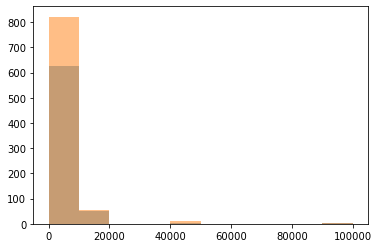

In [46]:
plt.hist(ad['units_sold'], alpha = 0.5)
plt.hist(no_ad['units_sold'], alpha = 0.5)
plt.show()

<AxesSubplot:title={'center':'units_sold'}, xlabel='uses_ad_boosts'>

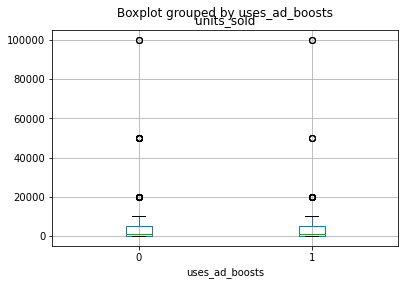

In [8]:
df.boxplot('units_sold', by = 'uses_ad_boosts')

In [9]:
print(stats.describe(ad['units_sold']))
print(stats.describe(no_ad['units_sold']))

DescribeResult(nobs=681, minmax=(10, 100000), mean=4167.136563876652, variance=84321945.17102873, skewness=6.100031109185601, kurtosis=53.74297553018778)
DescribeResult(nobs=892, minmax=(1, 100000), mean=4470.218609865471, variance=90062932.63341312, skewness=5.284494360844906, kurtosis=39.81938818872228)


In [10]:
#Based on the histograms, boxplots, and statistical descriptions of the data sets, it is difficult to see a very significant difference in the sales numbers. However, I do see that the distributions are clearly not normal given that the skewness and kurtosis values > |3|. I will use the Kruskal-Wallis test to analyze the results.
stats.kruskal(ad['units_sold'], no_ad['units_sold'])

KruskalResult(statistic=0.08201738240019896, pvalue=0.7745819060683752)

In [50]:
def get_95_ci(group_1, group_2):
    group_1_n = group_1.shape[0]
    group_2_n = group_2.shape[0]
    group_1_mean = group_1.mean()
    group_2_mean = group_2.mean()
    group_1_var = group_1.var()
    group_2_var = group_2.var()
    mean_diff = group_2_mean - group_1_mean
    std_err_diff = math.sqrt((group_1_var/group_1_n)+(group_2_var/group_2_n))
    margin_of_err = 1.96 * std_err_diff
    ci_lower = mean_diff - margin_of_err
    ci_upper = mean_diff + margin_of_err
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(ad['units_sold'], no_ad['units_sold']))

The difference in means at the 95% confidence interval (two-tail) is between -626.189867583291 and 1232.353959560929.


In [11]:
#Given that the statistic of 0.08 < 1.96 and p-value of 0.77 > 0.05, I fail to reject the null that there is not a significant difference between the sales numbers of the products that received advertisement and the ones that did not. The 95% confidence interval suggests that the difference in sales numbers between products that received advertisement versus those that did not is between -1232 and 626.

In [12]:
#The second hypothesis I will test is whether products with a greater number of ratings have higher overall ratings than those with fewer ratings. My null hypothesis is that the ratings will not be significantly different regardless of the number of ratings. My alternative hypothesis is that the ratings of products with fewer ratings will be significantly different from the ratings of products with a greater number of ratings. I divided the rating count into two groups with the higher rating count group, g_rating including the rating count mean. I will set alpha at 0.05.
g_rating = df[df['rating_count'] >= df['rating_count'].mean()]
f_rating = df[df['rating_count'] < df['rating_count'].mean()]

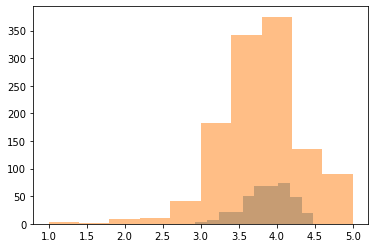

In [45]:
plt.hist(g_rating['rating'], alpha = 0.5)
plt.hist(f_rating['rating'], alpha = 0.5)
plt.show()

In [15]:
df['num_rating'] = np.where(df['rating_count'] >= df['rating_count'].mean(), 'Greater', 'Fewer')

In [16]:
df['num_rating'].value_counts()

Fewer      1193
Greater     380
Name: num_rating, dtype: int64

<AxesSubplot:title={'center':'rating'}, xlabel='num_rating'>

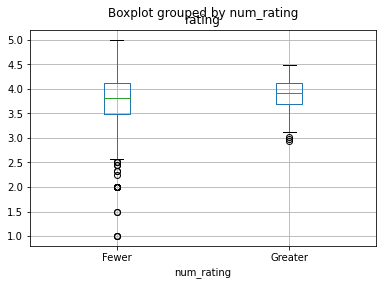

In [17]:
df.boxplot('rating', by = 'num_rating')

In [18]:
#When looking at the histograms and boxplots, there appears to be a slightly higher average rating in the group with a higher number of ratings. The distributions also appear to be more normal.
print(stats.describe(g_rating['rating']))
print(stats.describe(f_rating['rating']))

DescribeResult(nobs=380, minmax=(2.93, 4.48), mean=3.8823947368421052, variance=0.09048369601444244, skewness=-0.45055487252910187, kurtosis=-0.15948685361346593)
DescribeResult(nobs=1193, minmax=(1.0, 5.0), mean=3.8013076278290017, variance=0.31992496652733793, skewness=-0.4334478027306236, kurtosis=2.066578935676346)


In [19]:
print(stats.shapiro(g_rating['rating']))
print(stats.shapiro(f_rating['rating']))

ShapiroResult(statistic=0.9819887280464172, pvalue=0.00011136983812320977)
ShapiroResult(statistic=0.9626278281211853, pvalue=6.039293297852938e-17)


In [20]:
#Given that the skewness and kurtosis values are within range of /3/, I can use the t-test for independent samples. I will also use the Kruskal-Wallis test to confirm the results.
stats.ttest_ind(g_rating['rating'], f_rating['rating'])

Ttest_indResult(statistic=2.6762511850428097, pvalue=0.007522485409185718)

In [21]:
stats.kruskal(g_rating['rating'], f_rating['rating'])

KruskalResult(statistic=10.925730946908297, pvalue=0.0009483777787765655)

In [49]:
print(get_95_ci(g_rating['rating'], f_rating['rating']))

The difference in means at the 95% confidence interval (two-tail) is between -0.12518856567283262 and -0.03698565235337806.


In [22]:
#Given that in both of the tests, the statistics are greater than 1.96 and the p-values are smaller than 0.05, I will reject the null hypothesis that ratings will not be significantly different regardless of the number of ratings. The 95% confidence interval suggests that the difference in average ratings between products with a greater number of ratings and those with fewer ratings is between 0.04 and 0.13.

In [23]:
#For our third hypothesis, I will be testing whether products with higher ratings have higher sales numbers. Our null is that there is no significant difference between the sales numbers of products with higher and lower ratings. Our alternative hypothesis is that the products with higher ratings have different sales numbers from the products with lower ratings. We divide the ratings into two groups with the higher rating group including the rating mean. We will set alpha at 0.05.
h_rating = df[df['rating'] >= df['rating'].mean()]
l_rating = df[df['rating'] < df['rating'].mean()]

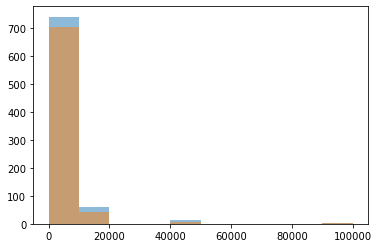

In [48]:
plt.hist(h_rating['units_sold'], alpha = 0.5)
plt.hist(l_rating['units_sold'], alpha = 0.5)
plt.show()

In [26]:
df['amt_rating'] = np.where(df['rating'] >= df['rating'].mean(), 'Higher', 'Lower')

In [27]:
df['amt_rating'].value_counts()

Higher    816
Lower     757
Name: amt_rating, dtype: int64

<AxesSubplot:title={'center':'units_sold'}, xlabel='amt_rating'>

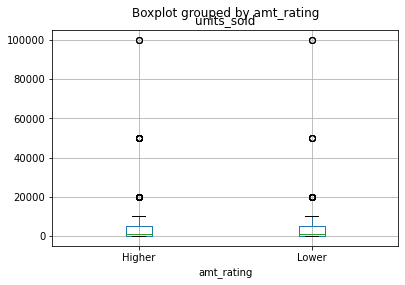

In [28]:
df.boxplot('units_sold', by = 'amt_rating')

In [29]:
#Based on the histograms and boxplots, it is difficult to tell how different the distributions are. The distributions also appear to be very skewed to the right.
print(stats.describe(h_rating['units_sold']))
print(stats.describe(l_rating['units_sold']))

DescribeResult(nobs=816, minmax=(1, 100000), mean=4900.542892156863, variance=95926171.25705372, skewness=5.033291240464076, kurtosis=36.835218201968814)
DescribeResult(nobs=757, minmax=(2, 100000), mean=3733.701453104359, variance=77917957.02715395, skewness=6.460879504396806, kurtosis=58.91573489845412)


In [30]:
#Given that the skewness and kurtosis of the groups > |3|, I will use the Kruskal-Wallis test.
stats.kruskal(h_rating['units_sold'], l_rating['units_sold'])

KruskalResult(statistic=5.235684940491926, pvalue=0.022128093806169875)

In [51]:
print(get_95_ci(h_rating['units_sold'], l_rating['units_sold']))

The difference in means at the 95% confidence interval (two-tail) is between -2087.178869678201 and -246.5040084268063.


In [31]:
#Given that the statistic of 5.24 > 1.96 and the p-value of 0.02 < 0.05, I will reject the null that there is no significant difference between the sales numbers of products with higher and lower ratings. The 95% confidence interval suggests that the difference in the average number of units sold between products with higher and lower ratings is between 247 and 2087.

In [33]:
#Finally, the last hypothesis I will test is whether products with higher merchant ratings have higher sales numbers. My null is that there is no significant difference between the sales numbers of products with higher and lower merchant ratings. My alternative hypothesis is that there is a significant difference between the sales numbers. I divided the merchant ratings into two groups with the higher rating group including the rating mean. I will set alpha at 0.05.
hm_rating = df[df['merchant_rating'] >= df['merchant_rating'].mean()]
lm_rating = df[df['merchant_rating'] < df['merchant_rating'].mean()]

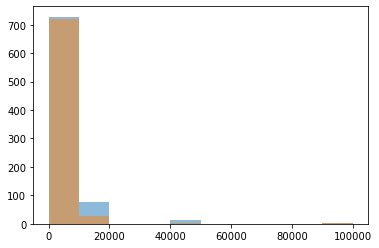

In [52]:
plt.hist(hm_rating['units_sold'], alpha = 0.5)
plt.hist(lm_rating['units_sold'], alpha = 0.5)
plt.show()

In [36]:
df['amt_mrating'] = np.where(df['merchant_rating'] >= df['merchant_rating'].mean(), 'Higher', 'Lower')

In [37]:
df['amt_mrating'].value_counts()

Higher    823
Lower     750
Name: amt_mrating, dtype: int64

<AxesSubplot:title={'center':'units_sold'}, xlabel='amt_mrating'>

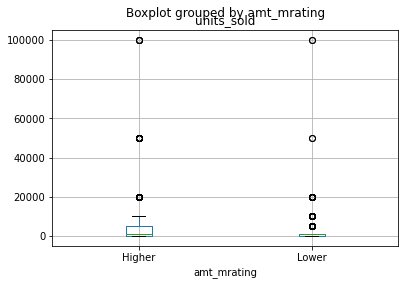

In [38]:
df.boxplot('units_sold', by = 'amt_mrating')

In [39]:
#Based on the histograms and boxplots, the group with higher merchant ratings has a higher concentration around the mean while the group with lower merchant ratings has more of an outlier spread. The distributions also appear to be very skewed to the right.
print(stats.describe(hm_rating['units_sold']))
print(stats.describe(lm_rating['units_sold']))

DescribeResult(nobs=823, minmax=(2, 100000), mean=5645.437424058323, variance=116914386.51402353, skewness=4.654381747582054, kurtosis=30.747792601954785)
DescribeResult(nobs=750, minmax=(1, 100000), mean=2905.4133333333334, variance=51496377.16137072, skewness=7.916080239286076, kurtosis=92.83109990010762)


In [40]:
#Given that the skewness and kurtosis of the groups > |3|, I will use the Kruskal-Wallis test.
stats.kruskal(hm_rating['units_sold'], lm_rating['units_sold'])

KruskalResult(statistic=58.39507246257622, pvalue=2.1442739526010287e-14)

In [54]:
print(get_95_ci(hm_rating['units_sold'], lm_rating['units_sold']))

The difference in means at the 95% confidence interval (two-tail) is between -3639.7486978185148 and -1840.2994836314642.


In [53]:
#Given that the statistic of 58.40 > 1.96 and the p-value of 2.14*10^(-14) < 0.05, I will reject the null that there is no significant difference between the sales numbers of products with higher and lower merchant ratings. The 95% confidence interval suggests that the difference in the average sales numbers for the products with higher and lower merchant ratings is between 1840 and 3640.

In [ ]:
#Before everything is wrapped up, I would like to say a couple of comments about the data. First, I was expecting there to be a significant difference between the sales numbers of the products that received advertising versus those that did not. A possible reason why this was not the case may be because some products are bought more frequently than others to the extent that advertising did not substantially increase the sales numbers of the less popular products enough. I do not know enough about apparel to test this. I would also like to see what kinds of advertising were used to understand it better. I would have liked to test whether the discounted price made a difference in the sales number, but the original sales numbers for the products are not available. To get a more accurate picture of the sales numbers by product ratings, I would need a breakdown of the sales numbers associated with each product rating, which the data does not include.